# Attempt Grover Search on 4 Bits Recognizing Binary Place Values

In [1122]:
#Import qiskit libraries
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [1123]:
#Specify number of qubits
numOfQubits = 4
 
qr = QuantumRegister(numOfQubits, 'q')
anc = QuantumRegister(1, 'anc')
cr = ClassicalRegister(numOfQubits, 'c')
qc = QuantumCircuit(qr,anc,cr)

In [1124]:
def init_superposition():
    qc.h(qr)
    qc.h(anc)

In [1125]:
# Build an oracle that recognizes 0000, 0001, 0010, 0100, 1000, 1111
def phase_oracle():
    qc.ccz(qr[0],qr[1],anc[0])
    qc.ccz(qr[0],qr[2],anc[0])
    qc.ccz(qr[0],qr[3],anc[0])
    qc.ccz(qr[1],qr[2],anc[0])
    qc.ccz(qr[1],qr[3],anc[0])
    qc.ccz(qr[2],qr[3],anc[0])
    

In [1126]:
# Build a generic diffusion operator
def diffusion():
    qc.h(qr)
    qc.h(anc)
    qc.x(qr)
    qc.x(anc)
    qc.h(anc)
    qc.mct(qr, anc[0]) 
    qc.h(anc)
    qc.x(qr)
    qc.h(qr)

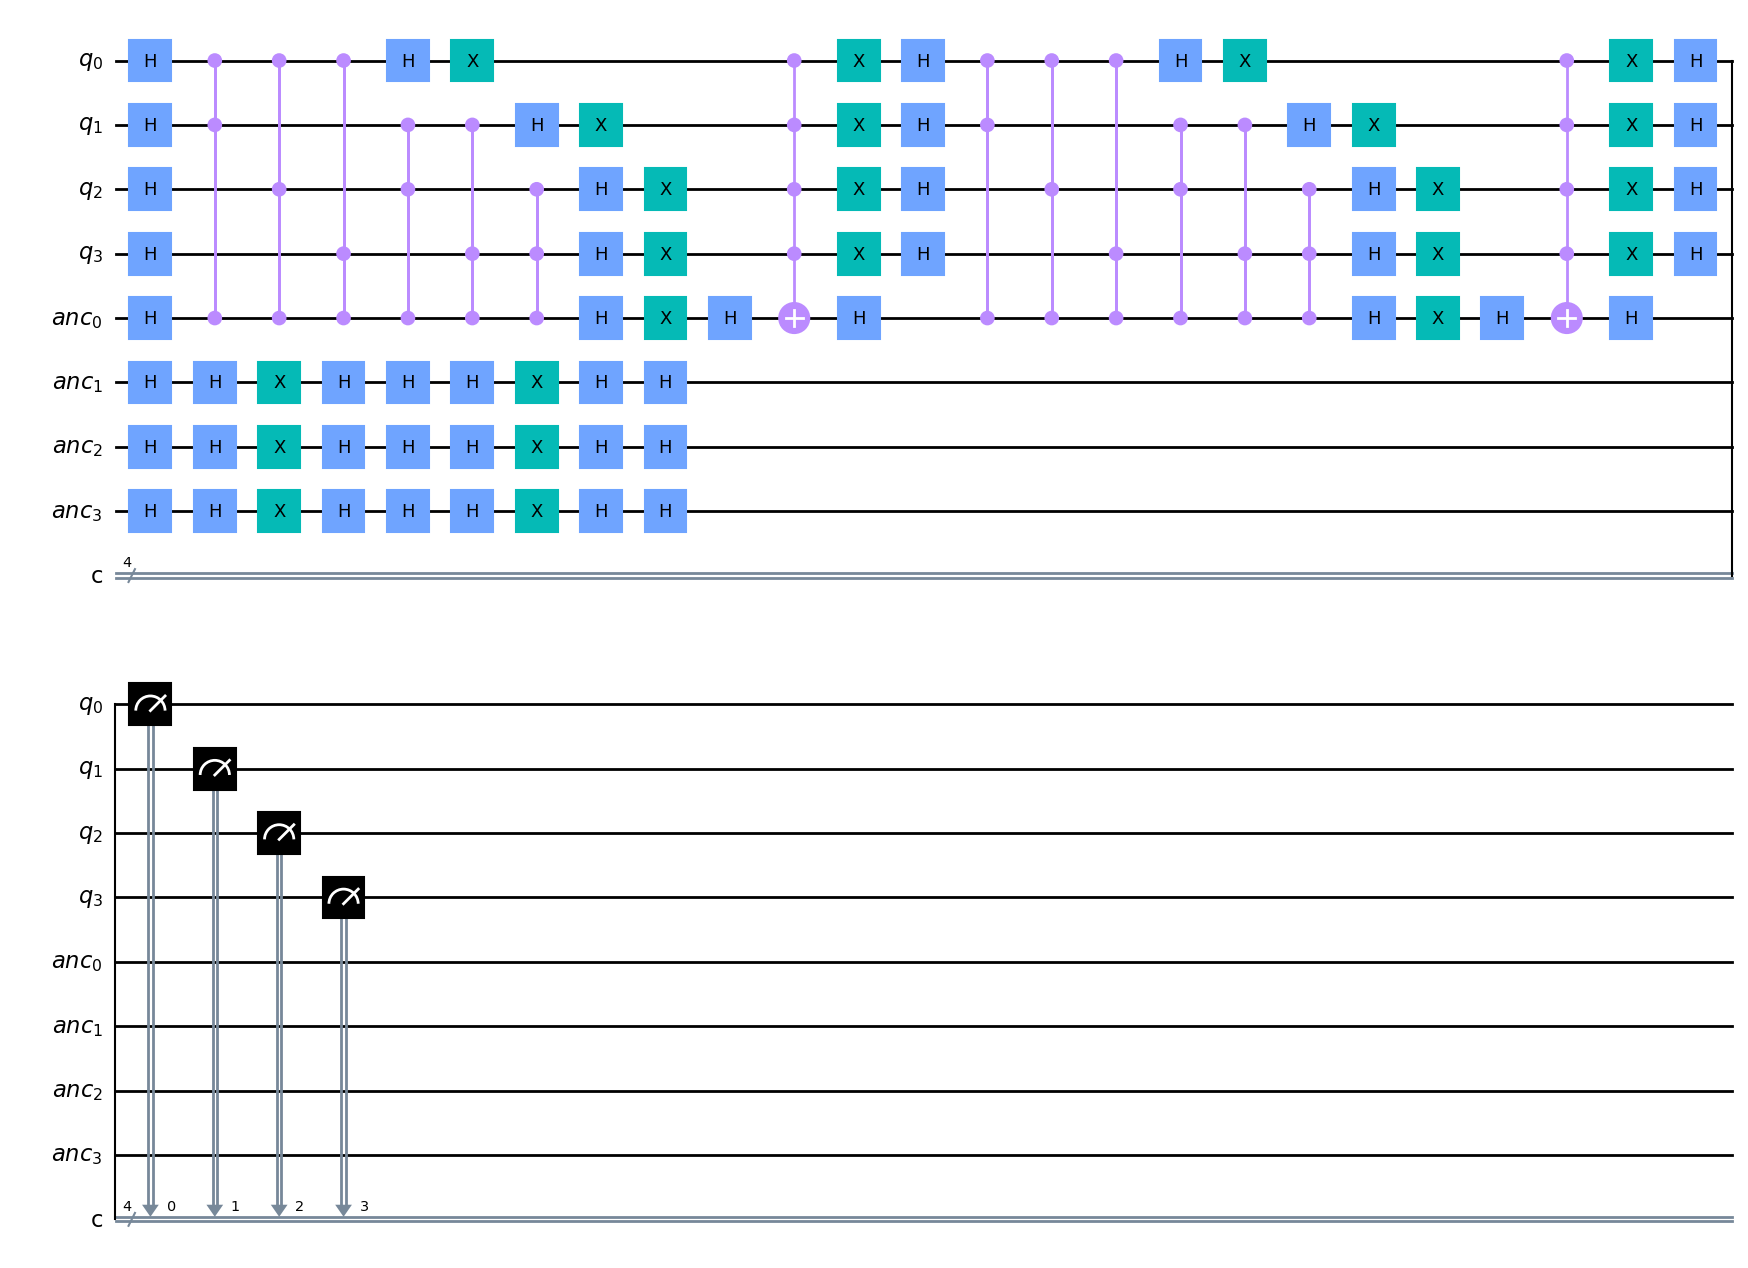

In [1127]:
# Build final circuit
init_superposition()
# Apply oracle and diffusion twice.
phase_oracle()
diffusion()
phase_oracle()
diffusion()
qc.measure(qr,cr)

# Display circuit diagram
qc.draw(output='mpl')

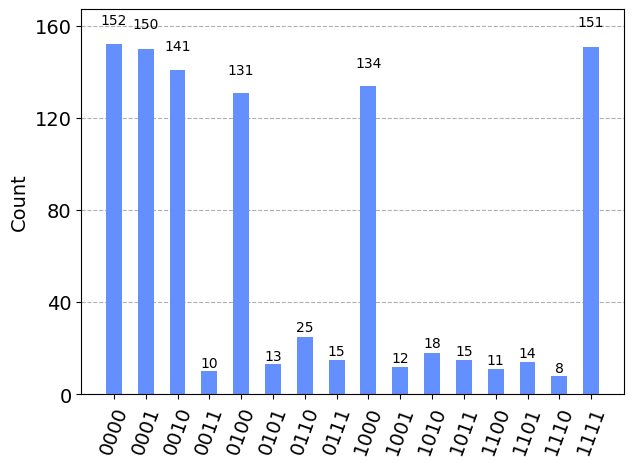

In [1128]:
# Execute and plot results
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(qc, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit, shots=1000).result()
counts = results.get_counts()
plot_histogram(counts)